# Designing a Predictive Model for Students’ Dropout and Academic Success

##### Group Members (Group 46): 
Erin Da, Lesley Mai, Xiaofei Sun, Yuchen Xu   
<hr style="opacity: 0.3" />

## 1. Introduction

Dropout rates and academic success play vital roles within higher education institutions<sup>[1]</sup>, the academic success not only affects individual students but also affects society at large. Therefore, harnessing the available data to predict students’ dropout and academic success status holds significant worth.

Our [dataset](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success) originates from a higher education institution, including students enrollment information (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first and second semesters<sup>[2]</sup>. Given a student with related features, we can classify the student’s academic status (enrolled, graduate or dropout).

#### Research question

We aim to **employ the K-Nearest Neighbors (KNN) classification algorithm to predict students' dropout and academic success statuses**. KNN is an intuitive algorithm that classifies new data points based on their similarity to existing data points in the feature space<sup>[3]</sup>. 

Moreover, we seek to identify the specific variables that hold the strongest influence over student dropout and academic success.

## 2. Methods & Results

### Preliminary exploratory data analysis

We load requisite packages for analysis, and read our dataset in a `.csv` file.

In [1]:
# packages
library(tidyverse)
library(repr)
library(tidymodels)
library(ggplot2)
library(cowplot)
options(repr.matrix.max.rows = 12) #limits output of dataframes to 6 rows

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [2]:
# load data
url <- "https://raw.githubusercontent.com/lesleymai/ds_group/main/academic_success.csv"

# use read_delim()to load our data as this dataset uses ; as a separator.
students_data <- read_delim(url, show_col_types = FALSE)

# convert column names to valid R names
colnames(students_data) <- make.names(colnames(students_data))
summary(students_data)

 Marital.status  Application.mode Application.order     Course    
 Min.   :1.000   Min.   : 1.00    Min.   :0.000     Min.   :  33  
 1st Qu.:1.000   1st Qu.: 1.00    1st Qu.:1.000     1st Qu.:9085  
 Median :1.000   Median :17.00    Median :1.000     Median :9238  
 Mean   :1.179   Mean   :18.67    Mean   :1.728     Mean   :8857  
 3rd Qu.:1.000   3rd Qu.:39.00    3rd Qu.:2.000     3rd Qu.:9556  
 Max.   :6.000   Max.   :57.00    Max.   :9.000     Max.   :9991  
 Daytime.evening.attendance. Previous.qualification
 Min.   :0.0000              Min.   : 1.000        
 1st Qu.:1.0000              1st Qu.: 1.000        
 Median :1.0000              Median : 1.000        
 Mean   :0.8908              Mean   : 4.578        
 3rd Qu.:1.0000              3rd Qu.: 1.000        
 Max.   :1.0000              Max.   :43.000        
 Previous.qualification..grade.  Nacionality      Mother.s.qualification
 Min.   : 95.0                  Min.   :  1.000   Min.   : 1.00         
 1st Qu.:125.0       

<center>Table 1: Raw students' performance dataset</center>

In [3]:
# count the number of rows containing at least one NA
num_na_rows <- sum(apply(is.na(students_data), 1, any))
print(num_na_rows)
# we can see that there're no NA rows in the dataset

[1] 0


In addition, we focus on predicting if a student achieves academic success by classifying him or her as a graduated student or a dropout, so we filter out the enrolled students in our dataset.

In [4]:
students_data_filtered <-  students_data |>
    filter(Target != "Enrolled") |>
    mutate(Target = as.factor(Target)) 


students_data_filtered

Marital.status,Application.mode,Application.order,Course,Daytime.evening.attendance.,Previous.qualification,Previous.qualification..grade.,Nacionality,Mother.s.qualification,Father.s.qualification,⋯,Curricular.units.2nd.sem..credited.,Curricular.units.2nd.sem..enrolled.,Curricular.units.2nd.sem..evaluations.,Curricular.units.2nd.sem..approved.,Curricular.units.2nd.sem..grade.,Curricular.units.2nd.sem..without.evaluations.,Unemployment.rate,Inflation.rate,GDP,Target
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,17,5,171,1,1,122.0,1,19,12,⋯,0,0,0,0,0.00000,0,10.8,1.4,1.74,Dropout
1,15,1,9254,1,1,160.0,1,1,3,⋯,0,6,6,6,13.66667,0,13.9,-0.3,0.79,Graduate
1,1,5,9070,1,1,122.0,1,37,37,⋯,0,6,0,0,0.00000,0,10.8,1.4,1.74,Dropout
1,17,2,9773,1,1,122.0,1,38,37,⋯,0,6,10,5,12.40000,0,9.4,-0.8,-3.12,Graduate
2,39,1,8014,0,1,100.0,1,37,38,⋯,0,6,6,6,13.00000,0,13.9,-0.3,0.79,Graduate
2,39,1,9991,0,19,133.1,1,37,37,⋯,0,5,17,5,11.50000,5,16.2,0.3,-0.92,Graduate
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
1,44,1,9070,1,39,120,1,3,38,⋯,5,9,10,7,13.14286,1,16.2,0.3,-0.92,Graduate
1,1,6,9773,1,1,125,1,1,1,⋯,0,6,8,5,12.66667,0,15.5,2.8,-4.06,Graduate


<center>Table 1.1: Students' performance dataset without the "Enrolled" students

We split dataset into a `training set` and a `test set` for further analysis and model evaluation. This ensures that our model's performance is assessed on unseen data, simulating real-world applications.

In [5]:
set.seed(2023) 
# Using a 75/25 split and stratifying on the target variable to ensure the sets have similar proportions of each class
students_split <- initial_split(students_data_filtered, prop = 0.75, strata = Target)

# Extract the training and testing data from the split
students_train <- training(students_split)
students_test <- testing(students_split) 

The whole table contains 37 explanatory variables, we select relevant variables that we hypothesized would have significant influence over academic success and dropout rates to build the classifier.

We first separate the training set into subsets of binary variables or of numerical vraibles:

In [6]:
students_binary_data<- students_train |>
select(Daytime.evening.attendance., 
Displaced, 
Debtor, 
Scholarship.holder,
Tuition.fees.up.to.date,
Educational.special.needs,
Gender,
International,
Target)

head(students_binary_data)

Daytime.evening.attendance.,Displaced,Debtor,Scholarship.holder,Tuition.fees.up.to.date,Educational.special.needs,Gender,International,Target
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,1,0,0,1,0,1,0,Dropout
1,1,0,0,0,0,1,0,Dropout
1,1,0,0,1,0,0,0,Dropout
1,0,1,0,0,0,1,0,Dropout
1,1,0,0,1,0,1,0,Dropout
1,0,0,0,1,0,0,0,Dropout


<center>Table 1.2.1: Filtered dataset with binary variables</center>

In [7]:
students_numerical_data <- students_train |>
      select(-Daytime.evening.attendance., 
-Displaced, 
-Debtor, 
-Scholarship.holder,
-Tuition.fees.up.to.date,
-Educational.special.needs,
-Gender,
-International)

head(students_numerical_data)

Marital.status,Application.mode,Application.order,Course,Previous.qualification,Previous.qualification..grade.,Nacionality,Mother.s.qualification,Father.s.qualification,Mother.s.occupation,⋯,Curricular.units.2nd.sem..credited.,Curricular.units.2nd.sem..enrolled.,Curricular.units.2nd.sem..evaluations.,Curricular.units.2nd.sem..approved.,Curricular.units.2nd.sem..grade.,Curricular.units.2nd.sem..without.evaluations.,Unemployment.rate,Inflation.rate,GDP,Target
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,17,5,171,1,122.0,1,19,12,5,⋯,0,0,0,0,0,0,10.8,1.4,1.74,Dropout
1,1,5,9070,1,122.0,1,37,37,9,⋯,0,6,0,0,0,0,10.8,1.4,1.74,Dropout
1,1,2,9853,1,133.0,1,19,37,4,⋯,0,6,0,0,0,0,12.7,3.7,-1.70,Dropout
1,39,1,33,1,130.0,1,38,37,9,⋯,0,7,7,1,10,0,8.9,1.4,3.51,Dropout
1,39,1,9119,10,133.1,1,34,37,0,⋯,0,5,0,0,0,0,7.6,2.6,0.32,Dropout
1,43,1,9147,1,140.0,1,37,37,6,⋯,0,5,8,2,12,2,16.2,0.3,-0.92,Dropout


<center>Table 1.2.2: Filtered dataset with numerical variables</center>

To select useful binary variables used for our KNN classification model, we calculate the proportions of Dropouts and Graduates with and without each variable, then we take the absolute values of the differences between the two statuses' proportions. We finally choose the variables with the highest absolute value of difference since this means the variables may help indicate different academic statuses.

In [37]:
dropout_total <- students_train |>
filter(Target == "Dropout") |>
count(Target)|> 
pull(n)                      

graduate_total <-  students_train |>
filter(Target == "Graduate") |>
count(Target)|>
pull(n)

drop_performance_factor <- students_binary_data |> 
    filter(Target == "Dropout")|>
    pivot_longer(cols = Daytime.evening.attendance.: International,
        names_to = "factors",
        values_to = "factors_value")|>
    group_by(factors, factors_value) |>
    summarize(prop = n()/dropout_total, .groups = "drop_last")|>
    arrange(desc(prop))

dropout_diff <- drop_performance_factor |>
        pivot_wider(names_from = factors_value, values_from = prop) |>
        mutate(diff = `1` - `0`)

grad_performance_factor <- students_binary_data |> 
    filter(Target == "Graduate")|>
    pivot_longer(cols = Daytime.evening.attendance.: International,
        names_to = "factors",
        values_to = "factors_value")|>
    group_by(factors, factors_value) |>
    summarize(prop = n()/graduate_total, .groups = "drop_last")|>
    arrange(desc(prop))

graduate_diff <- grad_performance_factor |>
        pivot_wider(names_from = factors_value, values_from = prop) |>
        mutate(diff = `1` - `0`)

dropout_diff$status <- "Dropout"
graduate_diff$status <- "Graduate"

combined_diff <- bind_rows(dropout_diff, graduate_diff)

final_diff <- dropout_diff |>
  inner_join(graduate_diff, by = "factors") |>
  mutate(difference = diff.x - diff.y) |>
  select(factors, difference)

final_diff_abs<- final_diff |>
    mutate(difference_abs = abs(difference)) |>
    select(-difference)
final_diff_abs

factors,difference_abs
<chr>,<dbl>
Educational.special.needs,0.011128121
International,0.001054637
Scholarship.holder,0.573474178
Daytime.evening.attendance.,0.100132680
Debtor,0.368173777
Tuition.fees.up.to.date,0.625073144
Displaced,0.274396135
Gender,0.496380214


<center>Table 2: Absolute difference between the propotions of Dropout difference and Graduate difference in binary variables</center>

We visualize the result above to see it more clearly:

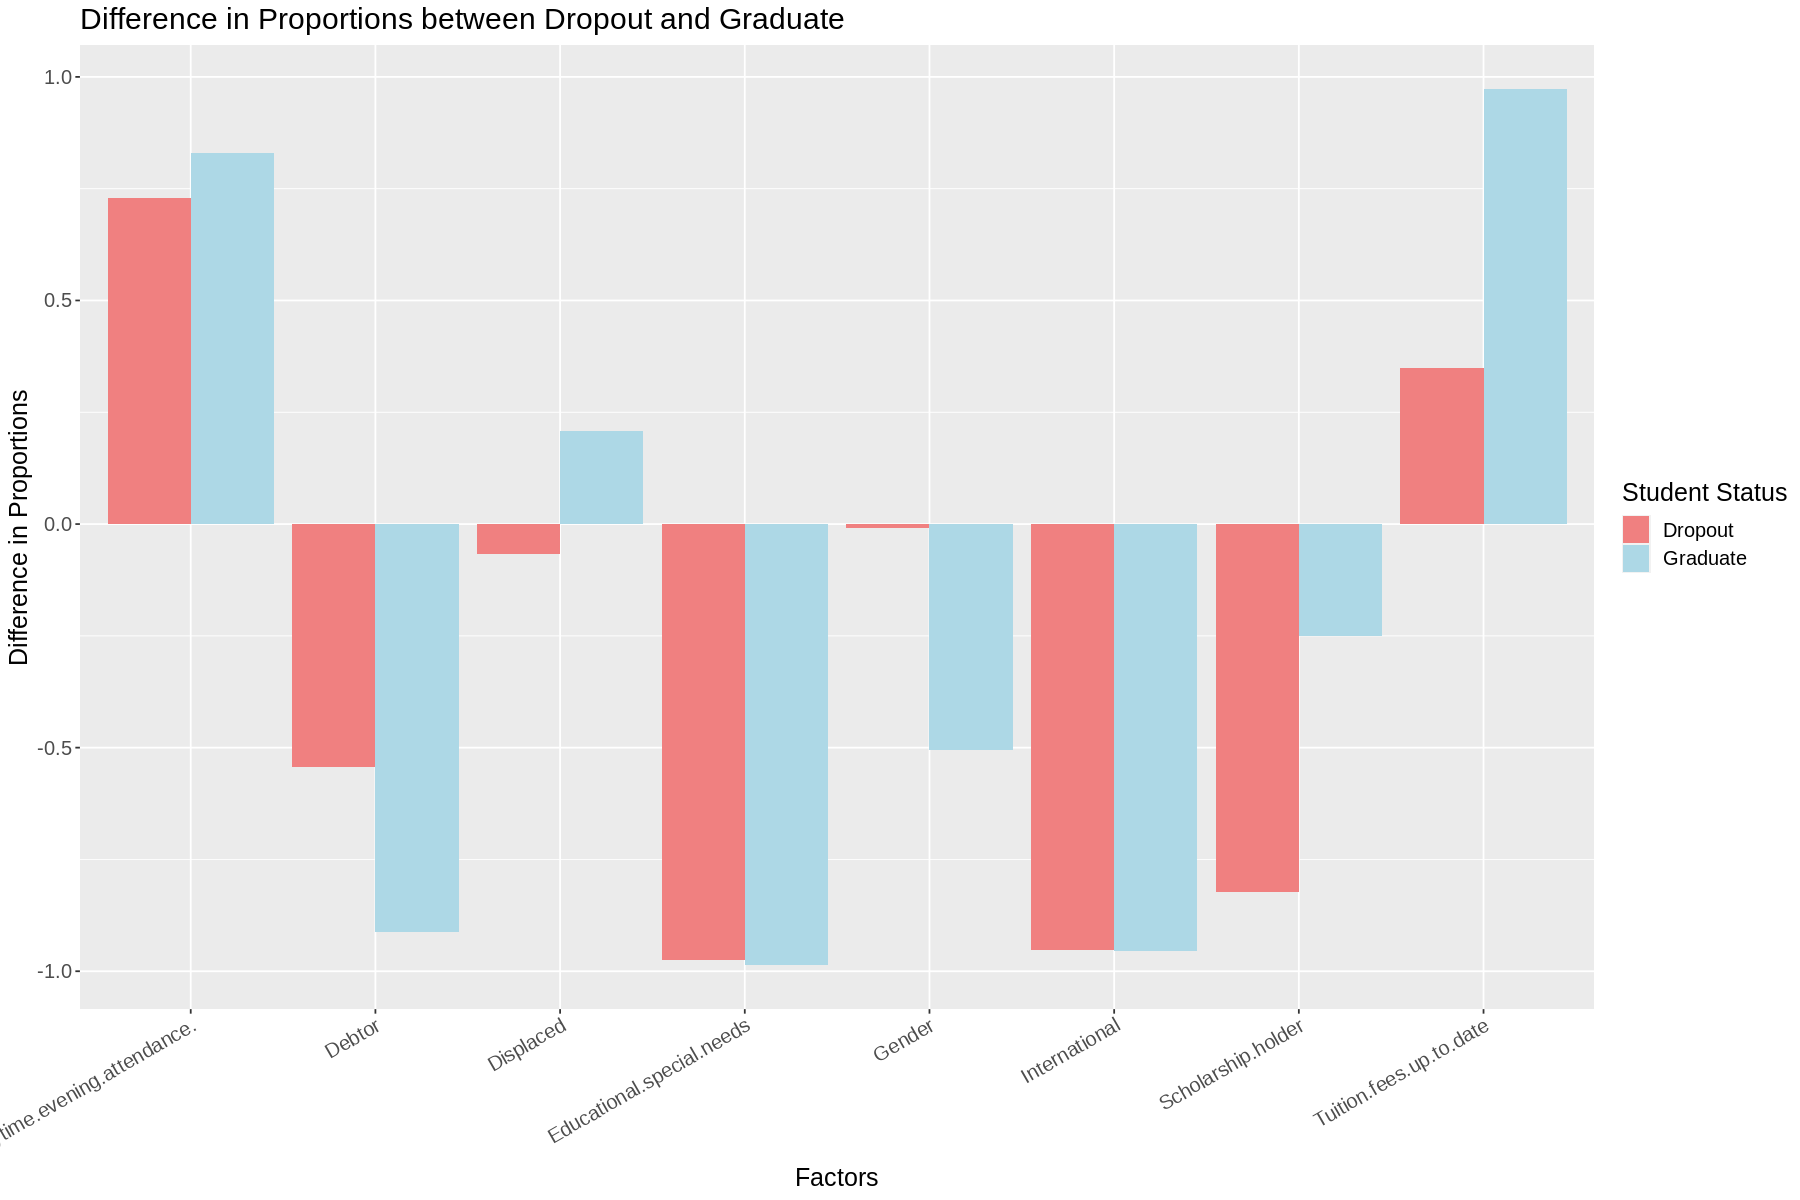

In [9]:
# visualization
options(repr.plot.width=15, repr.plot.height=10)

plotting <- ggplot(combined_diff, aes(x = factors, y = diff, fill = status)) +
  geom_bar(stat = "identity", position = position_dodge()) +
  theme(axis.text.x = element_text(angle = 30, hjust = 1)) +
  labs(x = "Factors", y = "Difference in Proportions", 
       title = "Difference in Proportions between Dropout and Graduate", 
       fill = "Student Status") +
  scale_fill_manual(values = c("Dropout" = "lightcoral", "Graduate" = "lightblue")) +
  theme(text = element_text(size = 15))
plotting

<center>Figure 2.1: comparison of Dropouts' and Graduates' proportions of numerical variables</center>

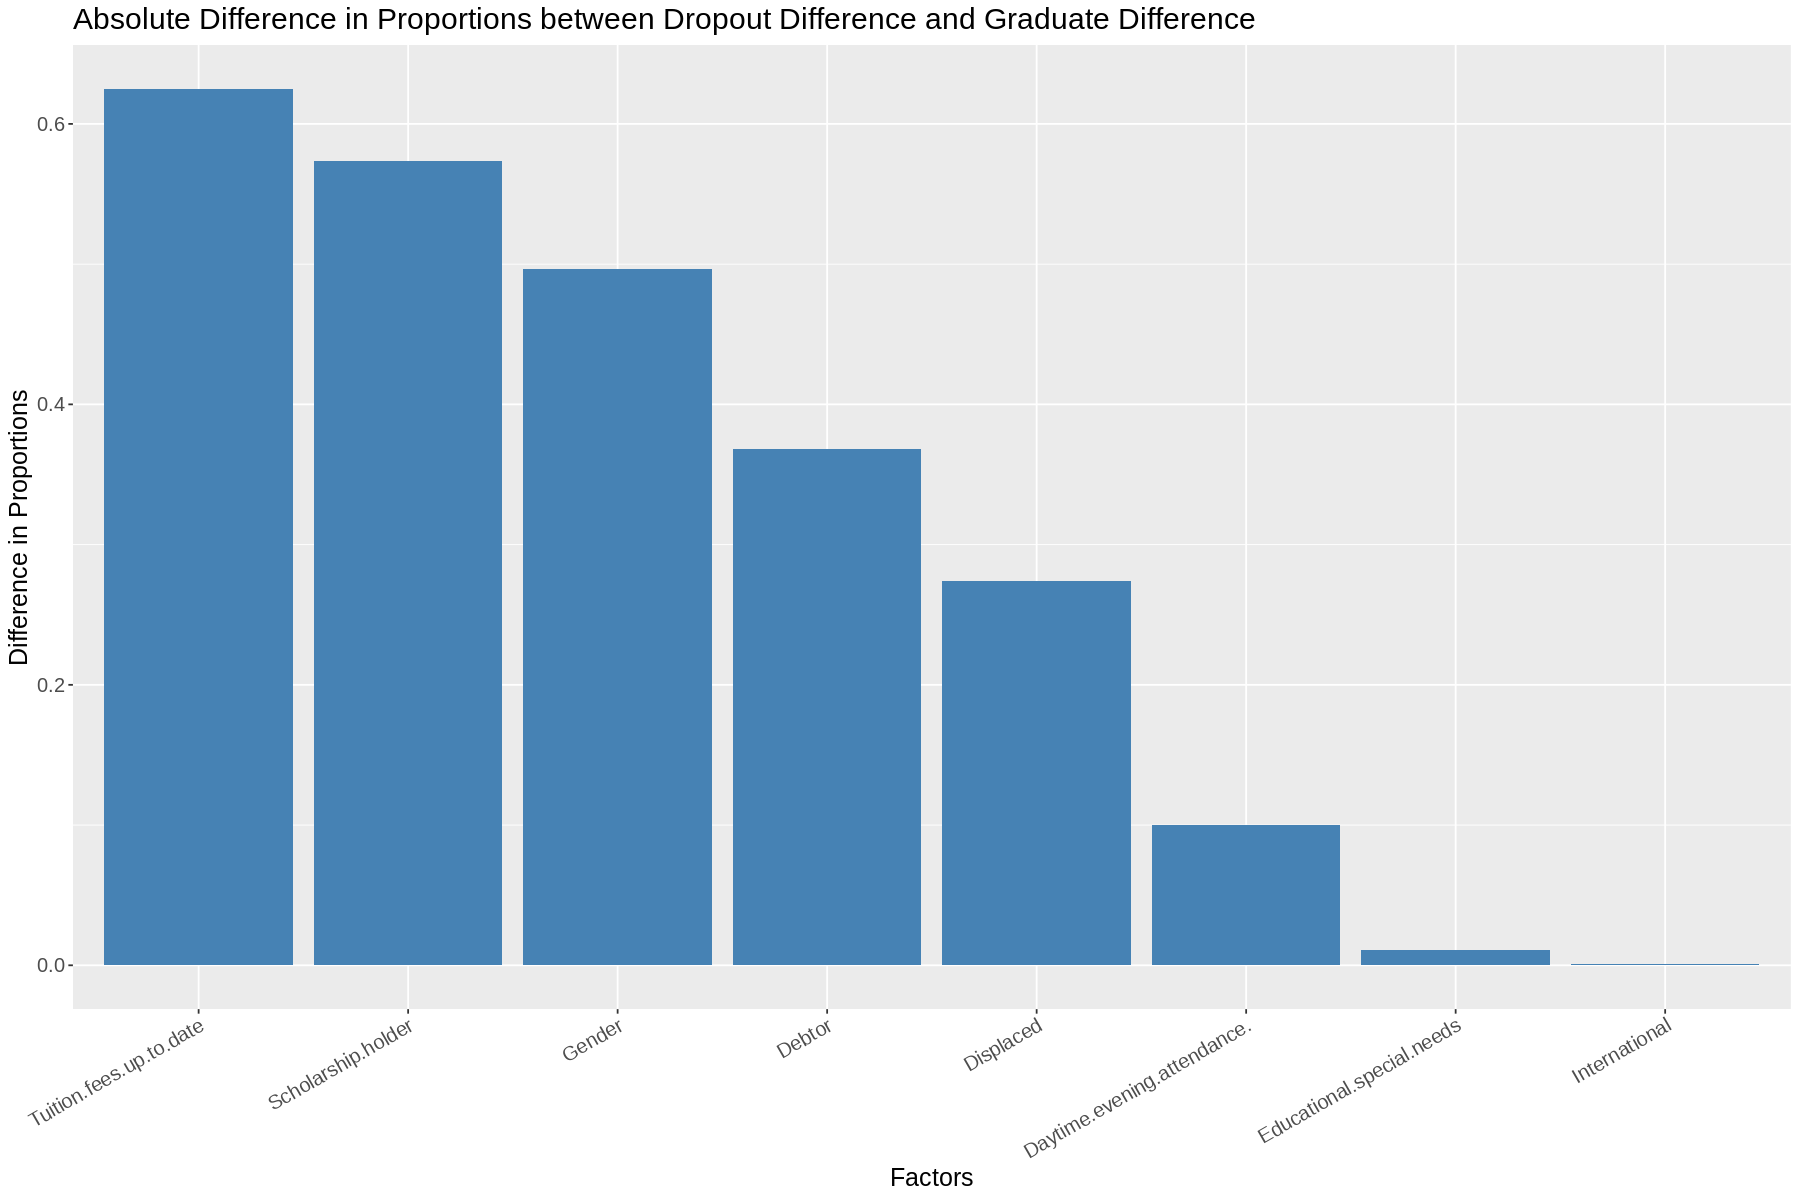

In [10]:
diff_plot <- ggplot(final_diff_abs, aes(x = reorder(factors, -difference_abs), y = difference_abs)) +
  geom_bar(stat = "identity", position = position_dodge(), fill = "steelblue") +
  theme(axis.text.x = element_text(angle = 30, hjust = 1)) +
  labs(x = "Factors", y = "Difference in Proportions", 
       title = "Absolute Difference in Proportions between Dropout Difference and Graduate Difference") +
  theme(text = element_text(size = 15))
diff_plot

<center>Figure 2.2: differences in proportions of numerical variables for Dropouts and Graduates</center>

By comparing the differences shown in the plot (Figure2.2) above, we think four of them (Tuition.fees.up.to.date, Debtor, Scholarship.holder, Gender) have the most obvious difference here, so we choose them as preselected variable used for further selection below.

For numerical variables, we directly draw the distributions of different status with each variable. We will choose the variables with the most obvious differences in the distribution under different academic statuses since this means the variables may contribute to a student's different academic statuses.

In [11]:
Marital_dis <- ggplot(students_numerical_data, aes(x = Marital.status, fill = Target)) +
    geom_histogram(binwidth = 0.5) +
    facet_grid(cols = vars(Target)) +
    labs(x = "Marital status", fill = "Study Status") +
    theme(text = element_text(size = 10))

AppMode_dis <- ggplot(students_numerical_data, aes(x = Application.mode, fill = Target)) +
    geom_histogram(binwidth = 5) +
    facet_grid(cols = vars(Target)) +
    labs(x = "Application mode", fill = "Study Status") +
    theme(text = element_text(size = 10))

AppOrder_dis <- ggplot(students_numerical_data, aes(x = Application.order, fill = Target)) +
    geom_histogram(binwidth = 1) +
    facet_grid(cols = vars(Target)) +
    labs(x = "Application order", fill = "Study Status") +
    theme(text = element_text(size = 10))

Course_dis<- ggplot(students_numerical_data, aes(x=Course, fill=Target))+
    geom_histogram(binwidth = 1000)+
    facet_grid(cols= vars(Target))+
    labs(x="Course",fill="study status")+
    theme(text=element_text(size=10))

PrevQual_dis<- ggplot(students_numerical_data, aes (x=Previous.qualification, fill=Target))+
    geom_histogram(binwidth = 5)+
    facet_grid(cols= vars(Target))+
    labs(x="Previous qualification",fill="study status")+
    theme(text=element_text(size=10))

PrevQualGrade_dis <- ggplot(students_numerical_data, aes(x = Previous.qualification..grade., fill = Target)) +
    geom_histogram(binwidth = 7) +
    facet_grid(cols = vars(Target)) +
    labs(x = "Previous qualification (grade)", fill = "Study Status") +
    theme(text = element_text(size = 10))

Nationality_dis<- students_numerical_data|>
    ggplot(aes(x=Nacionality, fill=Target))+
    geom_histogram(binwidth = 10) +
    facet_grid(cols= vars(Target))+
    labs(x="Nacionality",fill="study status")+
    theme(text=element_text(size=10))

MotherQual_dis<-students_numerical_data|>
    ggplot(aes(x=Mother.s.qualification , fill=Target))+
    geom_histogram(binwidth = 5)+
    facet_grid(cols= vars(Target))+
    labs(x="Mother’s qualification",fill="study status")+
    theme(text=element_text(size=10))

FatherQual_dis<-students_numerical_data|>
    ggplot(aes(x=Father.s.qualification , fill=Target))+
    geom_histogram(binwidth = 5)+
    facet_grid(cols= vars(Target))+
    labs(x="Father’s qualification",fill="study status")+
    theme(text=element_text(size=10))

MotherOccu_dis<-students_numerical_data|>
    ggplot(aes(x= Mother.s.occupation, fill=Target))+
    geom_histogram(binwidth = 13)+
    facet_grid(cols= vars(Target))+
    labs(x="Mother’s occupation",fill="study status")+
    theme(text=element_text(size=10))

FatherOccu_dis<-students_numerical_data|>
    ggplot(aes(x= Father.s.occupation, fill=Target))+
    geom_histogram(binwidth = 13)+
    facet_grid(cols= vars(Target))+
    labs(x="Mother’s occupation",fill="study status")+
    theme(text=element_text(size=10))

AdmissionGrade_dis<-students_numerical_data|>
    ggplot(aes(x=Admission.grade , fill=Target))+
    geom_histogram(binwidth = 7)+
    facet_grid(cols= vars(Target))+
    labs(x="Admission grade",fill="study status")+
    theme(text=element_text(size=10))

AgeEnroll_dis<-students_numerical_data|>
    ggplot(aes(x=Age.at.enrollment , fill=Target))+
    geom_histogram(binwidth = 5)+
    facet_grid(cols= vars(Target))+
    labs(x="Age at enrollment",fill="study status")+
    theme(text=element_text(size=10))

CurUnit1SemCrd_dis<-students_numerical_data|>
    ggplot(aes(x=Curricular.units.1st.sem..credited., fill=Target))+
    geom_histogram(binwidth = 3)+
    facet_grid(cols= vars(Target))+
    labs(x="Curricular units in the 1st semester(credited)",fill="study status")+
    theme(text=element_text(size=10))

CurUnit1SemEnr_dis<-students_numerical_data|>
    ggplot(aes(x=Curricular.units.1st.sem..enrolled., fill=Target))+
    geom_histogram(binwidth = 3)+
    facet_grid(cols= vars(Target))+
    labs(x="Curricular units in the 1st semester(erolled)", fill="study status")+
    theme(text=element_text(size=10))

CurUnit1SemEvalu_dis<-students_numerical_data|>
    ggplot(aes(x=Curricular.units.1st.sem..evaluations., fill=Target))+
    geom_histogram(binwidth = 4)+
    facet_grid(cols= vars(Target))+
    labs(x="Curricular units in the first semester (evaluation)",fill="study status")+
    theme(text=element_text(size=10))

CurUnit1SemAppr_dis<-students_numerical_data|>
    ggplot(aes(x=Curricular.units.1st.sem..approved., fill=Target))+
    geom_histogram(binwidth = 3)+
    facet_grid(cols= vars(Target))+
    labs(x="Curricular units in the 1st semester (approved)",fill="study status")+
    theme(text=element_text(size=10))

CurUnit1SemGrade_dis<-students_numerical_data|>
    ggplot(aes(x=Curricular.units.1st.sem..grade., fill=Target))+
    geom_histogram(binwidth = 2)+
    facet_grid(cols= vars(Target))+
    labs(x="Curricular units in the 1st semester (grade)",fill="study status")+
    theme(text=element_text(size=10))

CurUnit1SemNoEval_dis<-students_numerical_data|>
    ggplot(aes(x=Curricular.units.1st.sem..without.evaluations., fill=Target))+
    geom_histogram(binwidth = 1)+
    facet_grid(cols= vars(Target))+
    labs(x="Curricular units in the 1st semester (without evaluations)",fill="study status")+
    theme(text=element_text(size=10))

CurUnit2SemCrd_dis<-students_numerical_data|>
    ggplot(aes(x=Curricular.units.2nd.sem..credited., fill=Target))+
    geom_histogram(binwidth = 2)+
    facet_grid(cols= vars(Target))+
    labs(x="Curricular units 2nd.sem(credited)",fill="study status")+
    theme(text=element_text(size=10))

CurUnit2SemEnr_dis<-students_numerical_data|>
    ggplot(aes(x=Curricular.units.2nd.sem..enrolled., fill=Target))+
    geom_histogram(binwidth = 3)+
    facet_grid(cols= vars(Target))+
    labs(x="Curricular units 2nd.sem (enrolled)",fill="study status")+
    theme(text=element_text(size=10))

CurUnit2SemNoEval_dis<-students_numerical_data|>
    ggplot(aes(x=Curricular.units.2nd.sem..without.evaluations., fill=Target))+
    geom_histogram(binwidth = 2)+
    facet_grid(cols= vars(Target))+
    labs(x="Curricular units 2nd.sem (without evaluations)",fill="study status")+
    theme(text=element_text(size=10))

CurUnit2SemEvalu_dis<-students_numerical_data|>
    ggplot(aes(x=Curricular.units.2nd.sem..evaluations., fill=Target))+
    geom_histogram(binwidth = 3)+
    facet_grid(cols= vars(Target))+
    labs(x="Curricular units 2nd.sem ( evaluations)",fill="study status")+
    theme(text=element_text(size=10))

CurUnit2SemAppr_dis<-students_numerical_data|>
    ggplot(aes(x=Curricular.units.2nd.sem..approved., fill=Target))+
    geom_histogram(binwidth = 2)+
    facet_grid(cols= vars(Target))+
    labs(x="Curricular units 2nd.sem (approved)",fill="study status")+
    theme(text=element_text(size=10))

CurUnit2SemGrade_dis<-students_numerical_data|>
    ggplot(aes(x=Curricular.units.2nd.sem..grade., fill=Target))+
    geom_histogram(binwidth = 2)+
    facet_grid(cols= vars(Target))+
    labs(x="Curricular units 2nd.sem (grade)",fill="study status")+
    theme(text=element_text(size=10))

UnempRate_dis<-students_numerical_data|>
    ggplot(aes(x=Unemployment.rate, fill=Target))+
    geom_histogram(binwidth = 0.7)+
    facet_grid(cols= vars(Target))+
    labs(x="Unemployment rate",fill="study status")+
    theme(text=element_text(size=10))

InflaRate_dis<-students_numerical_data|>
    ggplot(aes(x=Inflation.rate, fill=Target))+
    geom_histogram(binwidth = 0.5)+
    facet_grid(cols= vars(Target))+
    labs(x="Inflation rate",fill="study status")+
    theme(text=element_text(size=10))

GDP_dis<-students_numerical_data|>
    ggplot(aes(x=GDP, fill=Target))+
    geom_histogram(binwidth = 0.7)+
    facet_grid(cols= vars(Target))+
    labs(x="GDP",fill="study status")+
    theme(text=element_text(size=10))

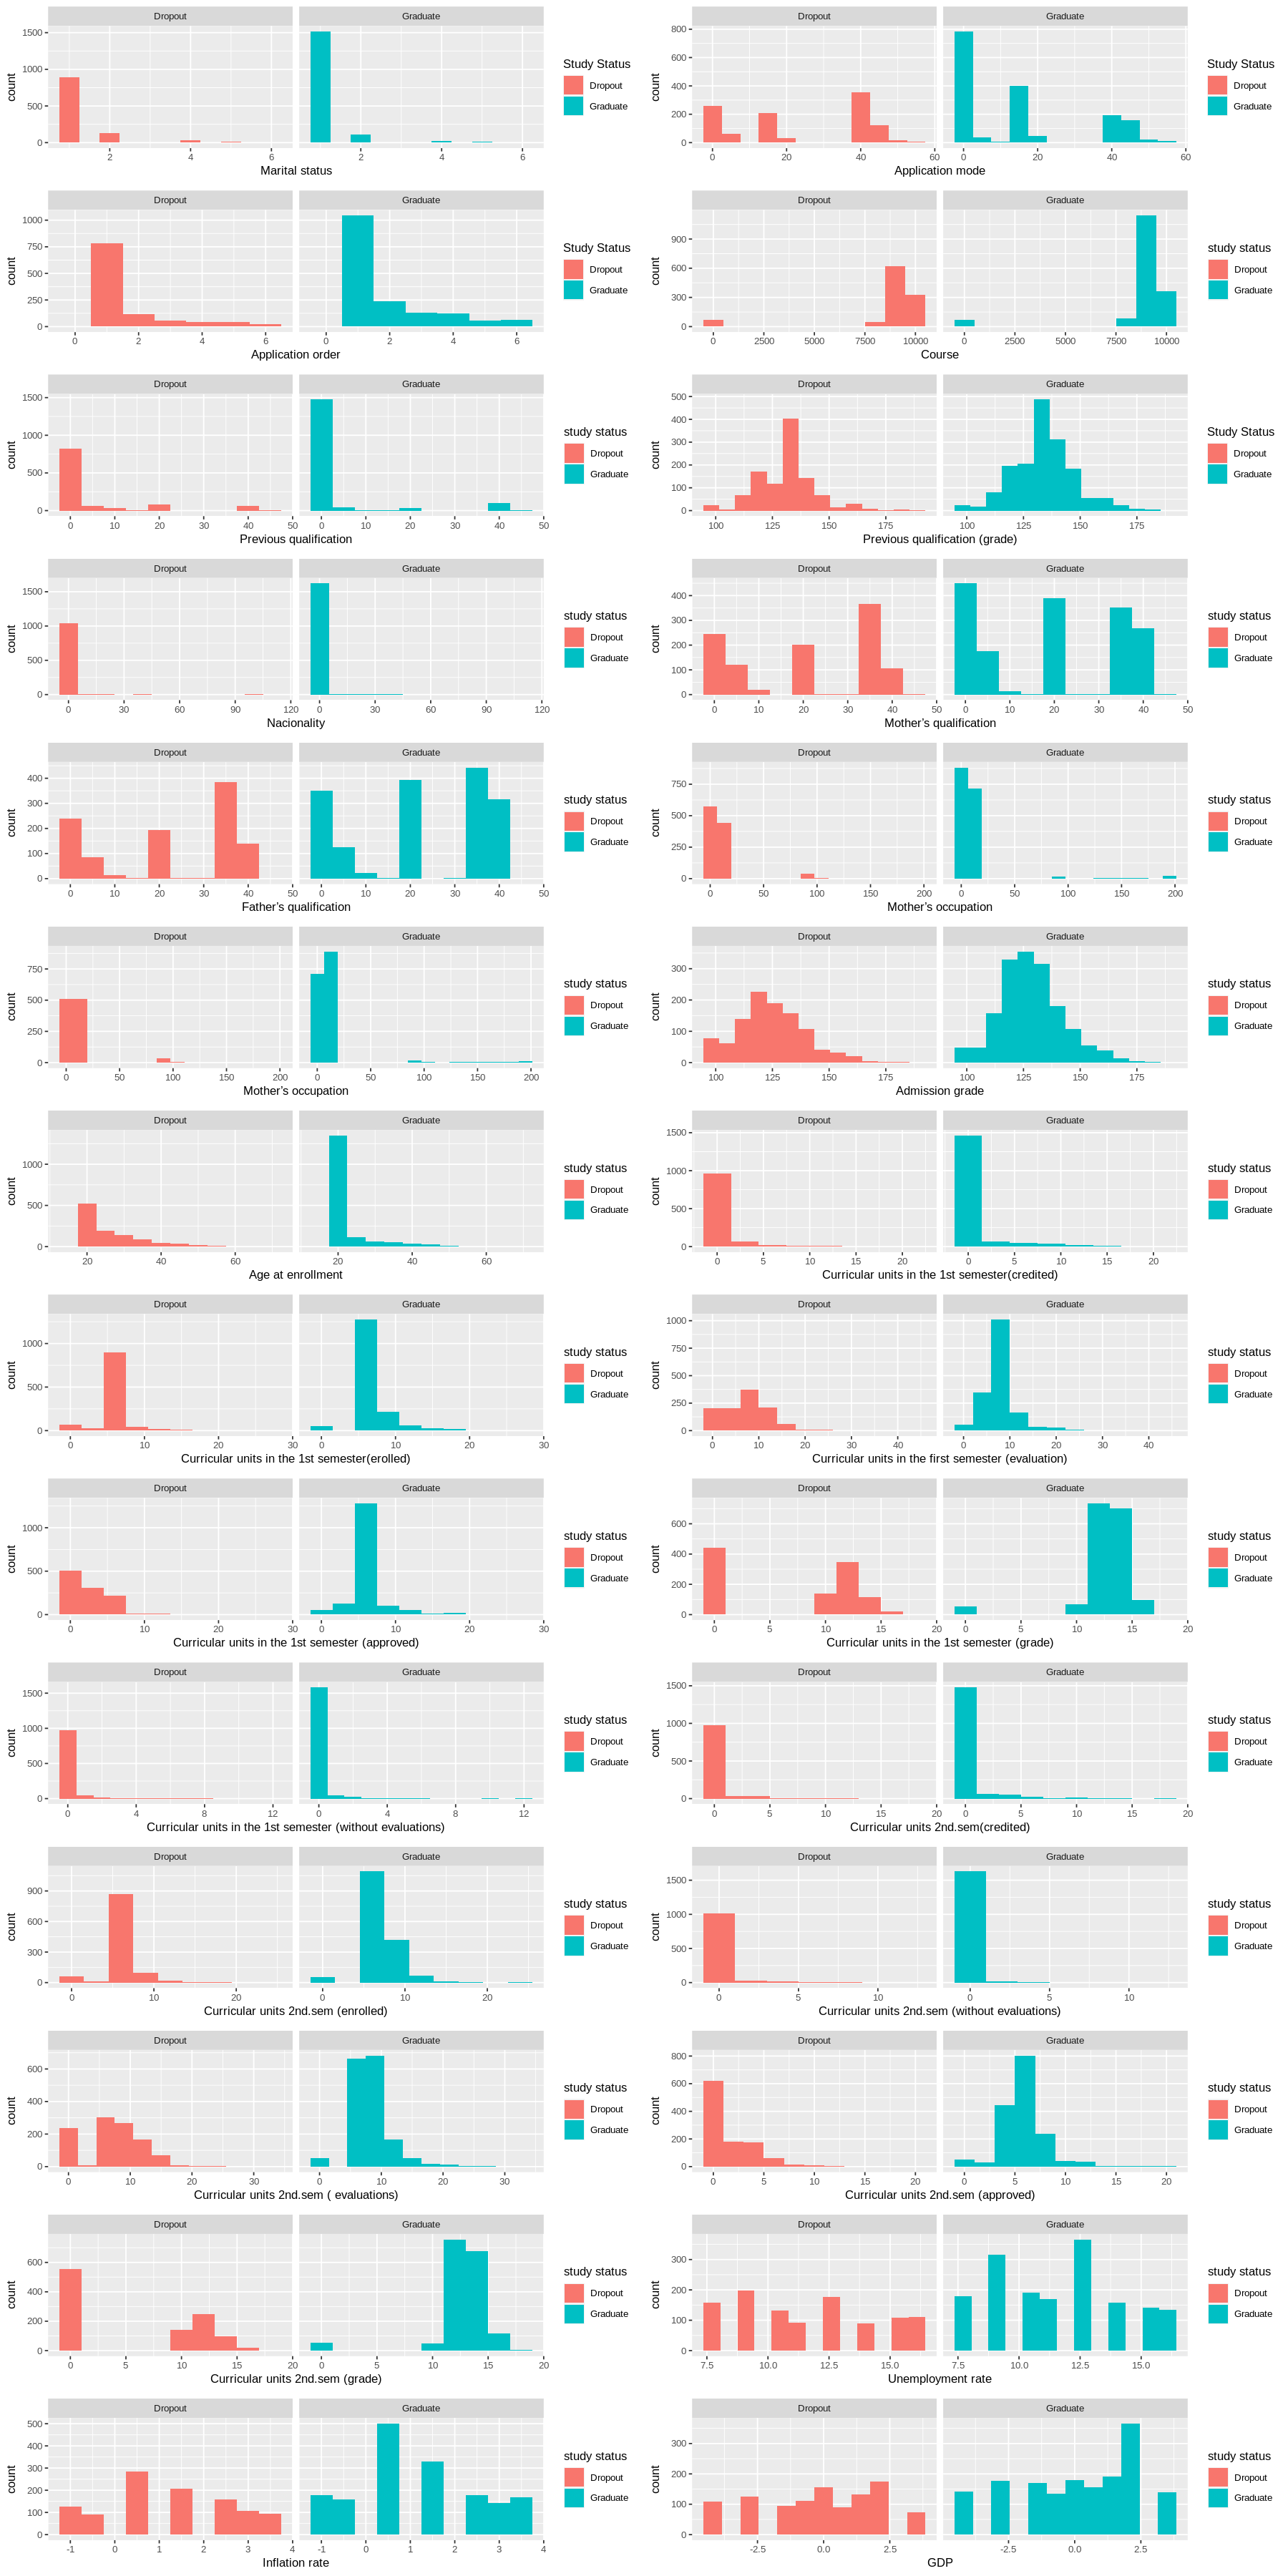

In [12]:
options(repr.plot.width = 15, repr.plot.height = 30)

plot_grid(Marital_dis, AppMode_dis, AppOrder_dis, Course_dis, PrevQual_dis, 
          PrevQualGrade_dis, Nationality_dis, MotherQual_dis, FatherQual_dis,  
          MotherOccu_dis, FatherOccu_dis, AdmissionGrade_dis, AgeEnroll_dis,
          CurUnit1SemCrd_dis, CurUnit1SemEnr_dis, CurUnit1SemEvalu_dis, 
          CurUnit1SemAppr_dis, CurUnit1SemGrade_dis, CurUnit1SemNoEval_dis,
          CurUnit2SemCrd_dis, CurUnit2SemEnr_dis, CurUnit2SemNoEval_dis,  
          CurUnit2SemEvalu_dis, CurUnit2SemAppr_dis, CurUnit2SemGrade_dis,
          UnempRate_dis, InflaRate_dis, GDP_dis, 
        align = "v",ncol = 2) 

<center>Figure 3: Comparison for numerical variables distribution</center>

By comparing the distributions of each pair of the plots above (Figure 3), we think five of them (Curricular.units.2nd.sem..grade., Curricular.units.2nd.sem..approved., Curricular.units.1st.sem..approved., Curricular.units.1st.sem..grade., Application.mode) have the most obvious difference in distribution of two students' statuses, so we choose them as preselected variable used for further selection below.

Here we use the forward selection method to further determine the predictor selection that maximize the accuracy of prediction:

In [13]:
# set.seed(2023)
students_subset <- students_train |>
    select(Target, Curricular.units.2nd.sem..grade., Curricular.units.2nd.sem..approved., Tuition.fees.up.to.date,
           Curricular.units.1st.sem..approved., Debtor, Scholarship.holder, Gender,
           Curricular.units.1st.sem..grade., Application.mode)
names <- colnames(students_subset |> select(-Target))

accuracies <- tibble(size = integer(), 
                     model_string = character(), 
                     accuracy = numeric())

knn_spec <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune()) |>
     set_engine("kknn") |>
     set_mode("classification")

students_vfold <- vfold_cv(students_subset, v = 5, strata = Target)

n_total <- length(names)

selected <- c()

# for every size from 1 to the total number of predictors
for (i in 1:n_total) {
    # for every predictor still not added yet
    accs <- list()
    models <- list()
    for (j in 1:length(names)) {
        # create a model string for this combination of predictors
        preds_new <- c(selected, names[[j]])
        model_string <- paste("Target", "~", paste(preds_new, collapse="+"))

        # create a recipe from the model string
        students_recipe <- recipe(as.formula(model_string), 
                                data = students_subset) |>
                          step_scale(all_predictors()) |>
                          step_center(all_predictors())

        # tune the KNN classifier with these predictors, and collect the accuracy for the best K
        acc <- workflow() |>
          add_recipe(students_recipe) |>
          add_model(knn_spec) |>
          tune_grid(resamples = students_vfold, grid = 10) |>
          collect_metrics() |>
          filter(.metric == "accuracy") |>
          summarize(mx = max(mean))
        acc <- acc$mx |> unlist()

        # add this result to the dataframe
        accs[[j]] <- acc
        models[[j]] <- model_string
    }
    jstar <- which.max(unlist(accs))
    accuracies <- accuracies |> 
      add_row(size = i, 
              model_string = models[[jstar]], 
              accuracy = accs[[jstar]])
    selected <- c(selected, names[[jstar]])
    names <- names[-jstar]
}
accuracies

size,model_string,accuracy
<int>,<chr>,<dbl>
1,Target ~ Curricular.units.2nd.sem..grade.,0.7717742
2,Target ~ Curricular.units.2nd.sem..grade.+Curricular.units.2nd.sem..approved.,0.8710031
3,Target ~ Curricular.units.2nd.sem..grade.+Curricular.units.2nd.sem..approved.+Tuition.fees.up.to.date,0.8923185
4,Target ~ Curricular.units.2nd.sem..grade.+Curricular.units.2nd.sem..approved.+Tuition.fees.up.to.date+Curricular.units.1st.sem..approved.,0.8967303
5,Target ~ Curricular.units.2nd.sem..grade.+Curricular.units.2nd.sem..approved.+Tuition.fees.up.to.date+Curricular.units.1st.sem..approved.+Debtor,0.8989382
6,Target ~ Curricular.units.2nd.sem..grade.+Curricular.units.2nd.sem..approved.+Tuition.fees.up.to.date+Curricular.units.1st.sem..approved.+Debtor+Scholarship.holder,0.8996735
7,Target ~ Curricular.units.2nd.sem..grade.+Curricular.units.2nd.sem..approved.+Tuition.fees.up.to.date+Curricular.units.1st.sem..approved.+Debtor+Scholarship.holder+Curricular.units.1st.sem..grade.,0.8993065
8,Target ~ Curricular.units.2nd.sem..grade.+Curricular.units.2nd.sem..approved.+Tuition.fees.up.to.date+Curricular.units.1st.sem..approved.+Debtor+Scholarship.holder+Curricular.units.1st.sem..grade.+Gender,0.8967296
9,Target ~ Curricular.units.2nd.sem..grade.+Curricular.units.2nd.sem..approved.+Tuition.fees.up.to.date+Curricular.units.1st.sem..approved.+Debtor+Scholarship.holder+Curricular.units.1st.sem..grade.+Gender+Application.mode,0.8996695


<center>Table 4: Accuracy and corresponding predictors</center>

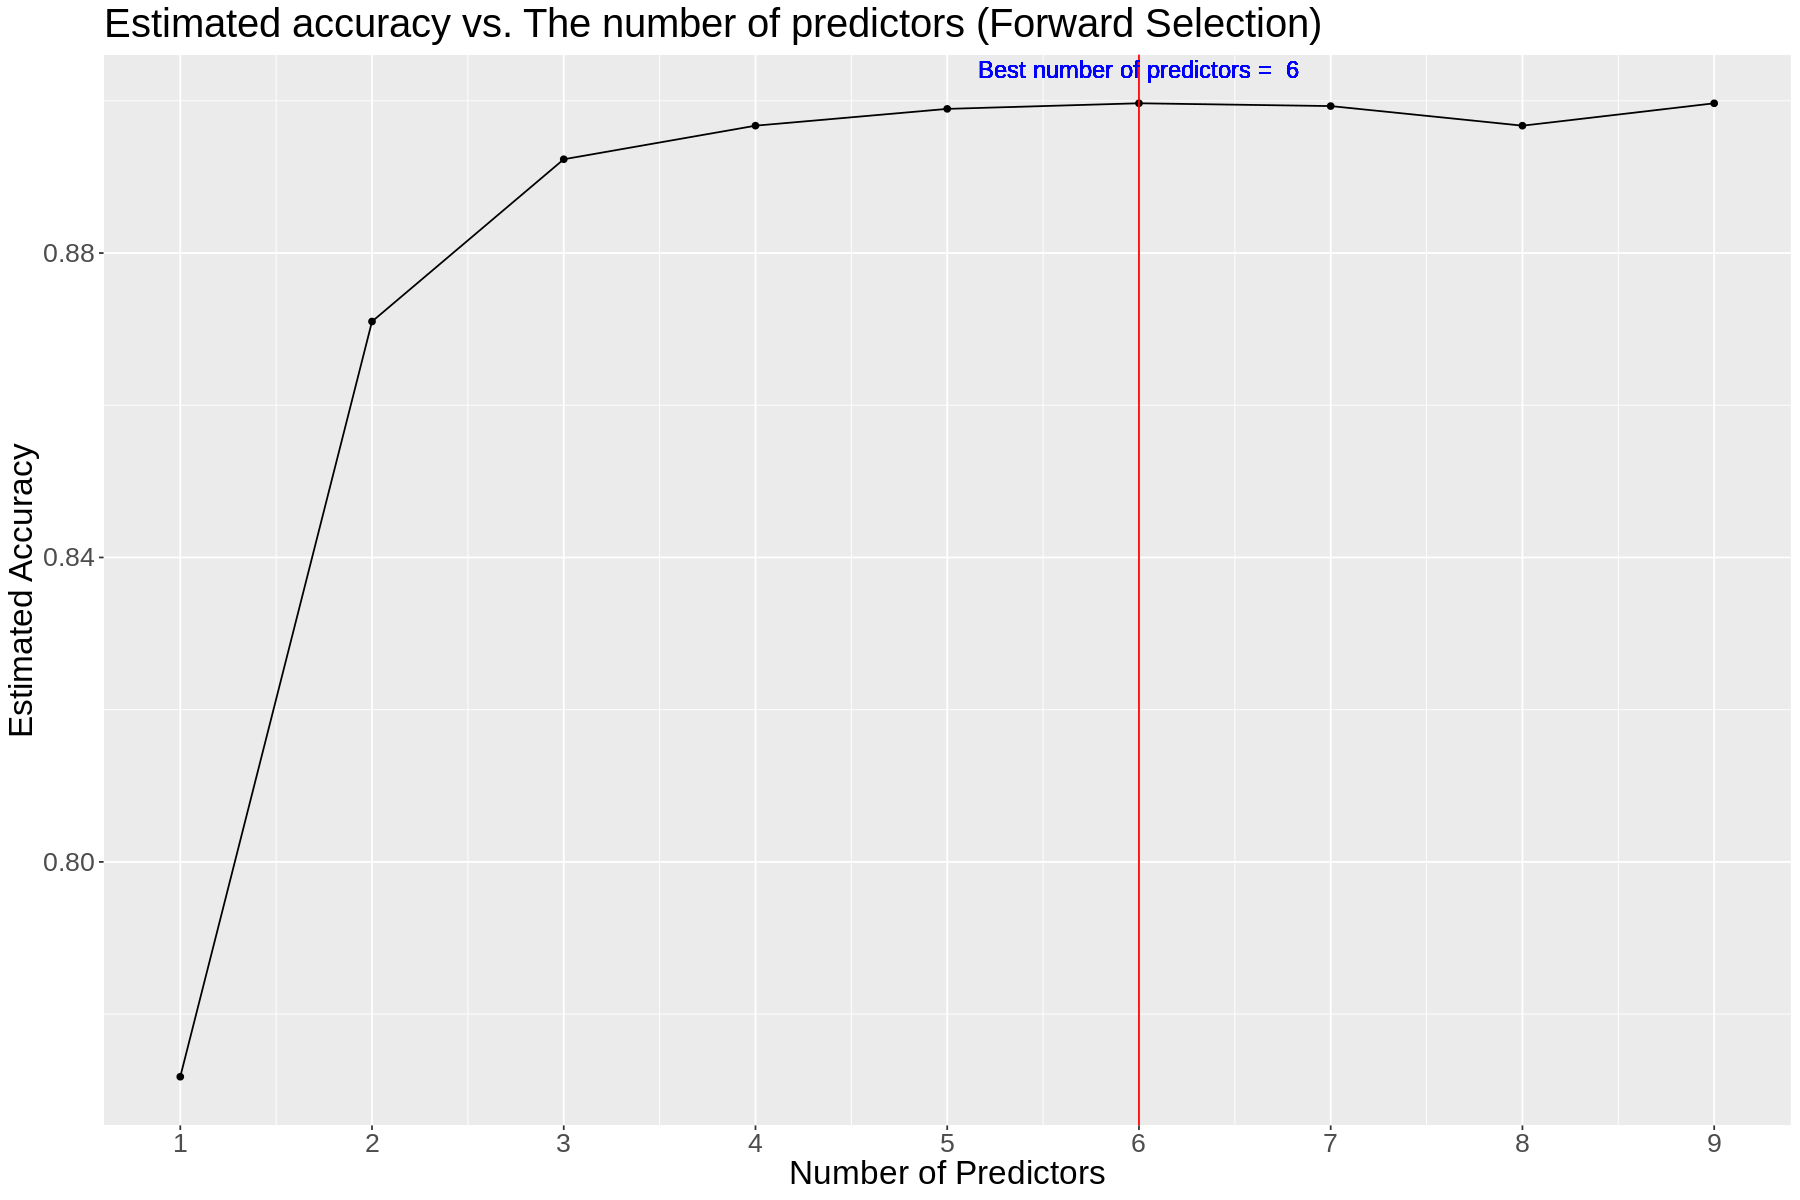

In [22]:
# Plotting estimated accuracy vs the number of predictors
options(repr.plot.width = 15, repr.plot.height = 10)

best_predrs <- accuracies$size[which.max(accuracies$accuracy)]
max_accuracy_pred <- max(accuracies$accuracy)

ggplot(accuracies, aes(x = size, y = accuracy)) +
    geom_point() + # To show each point
    geom_line() +  # To connect points with lines
    geom_vline(xintercept = best_predrs, color = "red") +
    labs(x = "Number of Predictors", y = "Estimated Accuracy") +
    ggtitle("Estimated accuracy vs. The number of predictors (Forward Selection)") +
    geom_text(aes(x = best_predrs, y = max_accuracy_pred, label = paste("Best number of predictors = ", best_predrs)), 
            vjust = -1.5, color = "blue", size = 5) +
    scale_x_continuous(limits = c(1,9), breaks = seq(1, 19)) +
    theme(text = element_text(size = 20)) 


<center>Figure 4: Plot of Table 4</center>

From the result, we can see when helpful predictors are added, the estimated accuracy increases; whereas adding irrelevant variables causes the accuracy to either exhibit
small fluctuations or decrease. So, finally we choose six variables (Tuition.fees.up.to.date, Scholarship.holder, Debtor, Curricular.units.1st.sem..approved., Curricular.units.2nd.sem..approved., Curricular.units.2nd.sem..grade.) as our predictors.

### KNN Classification modeling

Now we begin building our KNN classification classifier to answer a predictive question: Given that a student with the related infomation, could we predict he or she will graduate or drop out?

In KNN classification model, we tune the model with cross-validation to find the ideal K value.

In [15]:
set.seed(2023) 

students_recipe <- recipe(Target ~ Tuition.fees.up.to.date + Scholarship.holder + Debtor + Curricular.units.1st.sem..approved. + Curricular.units.2nd.sem..approved. + Curricular.units.2nd.sem..grade., data = students_train) |>
    step_scale(all_predictors()) |>
    step_scale(all_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

students_vfold <- vfold_cv(students_train, v = 10 , strata= Target) 

gridvals <- tibble(neighbors = seq(1,25))

students_results <- workflow() |>
    add_recipe(students_recipe) |>
    add_model(knn_spec)|>
    tune_grid(resamples = students_vfold, grid = gridvals)|>
    collect_metrics()|>
    filter(.metric == "accuracy")
students_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.8294800,10,0.004543726,Preprocessor1_Model01
2,accuracy,binary,0.8280053,10,0.004339223,Preprocessor1_Model02
3,accuracy,binary,0.8776140,10,0.003920155,Preprocessor1_Model03
4,accuracy,binary,0.8787169,10,0.003385170,Preprocessor1_Model04
5,accuracy,binary,0.8937879,10,0.006385228,Preprocessor1_Model05
6,accuracy,binary,0.8930526,10,0.006662951,Preprocessor1_Model06
⋮,⋮,⋮,⋮,⋮,⋮,⋮
20,accuracy,binary,0.8919416,10,0.007869078,Preprocessor1_Model20
21,accuracy,binary,0.8970806,10,0.007300465,Preprocessor1_Model21


<center>Table 5: Result of tuning the model</center>

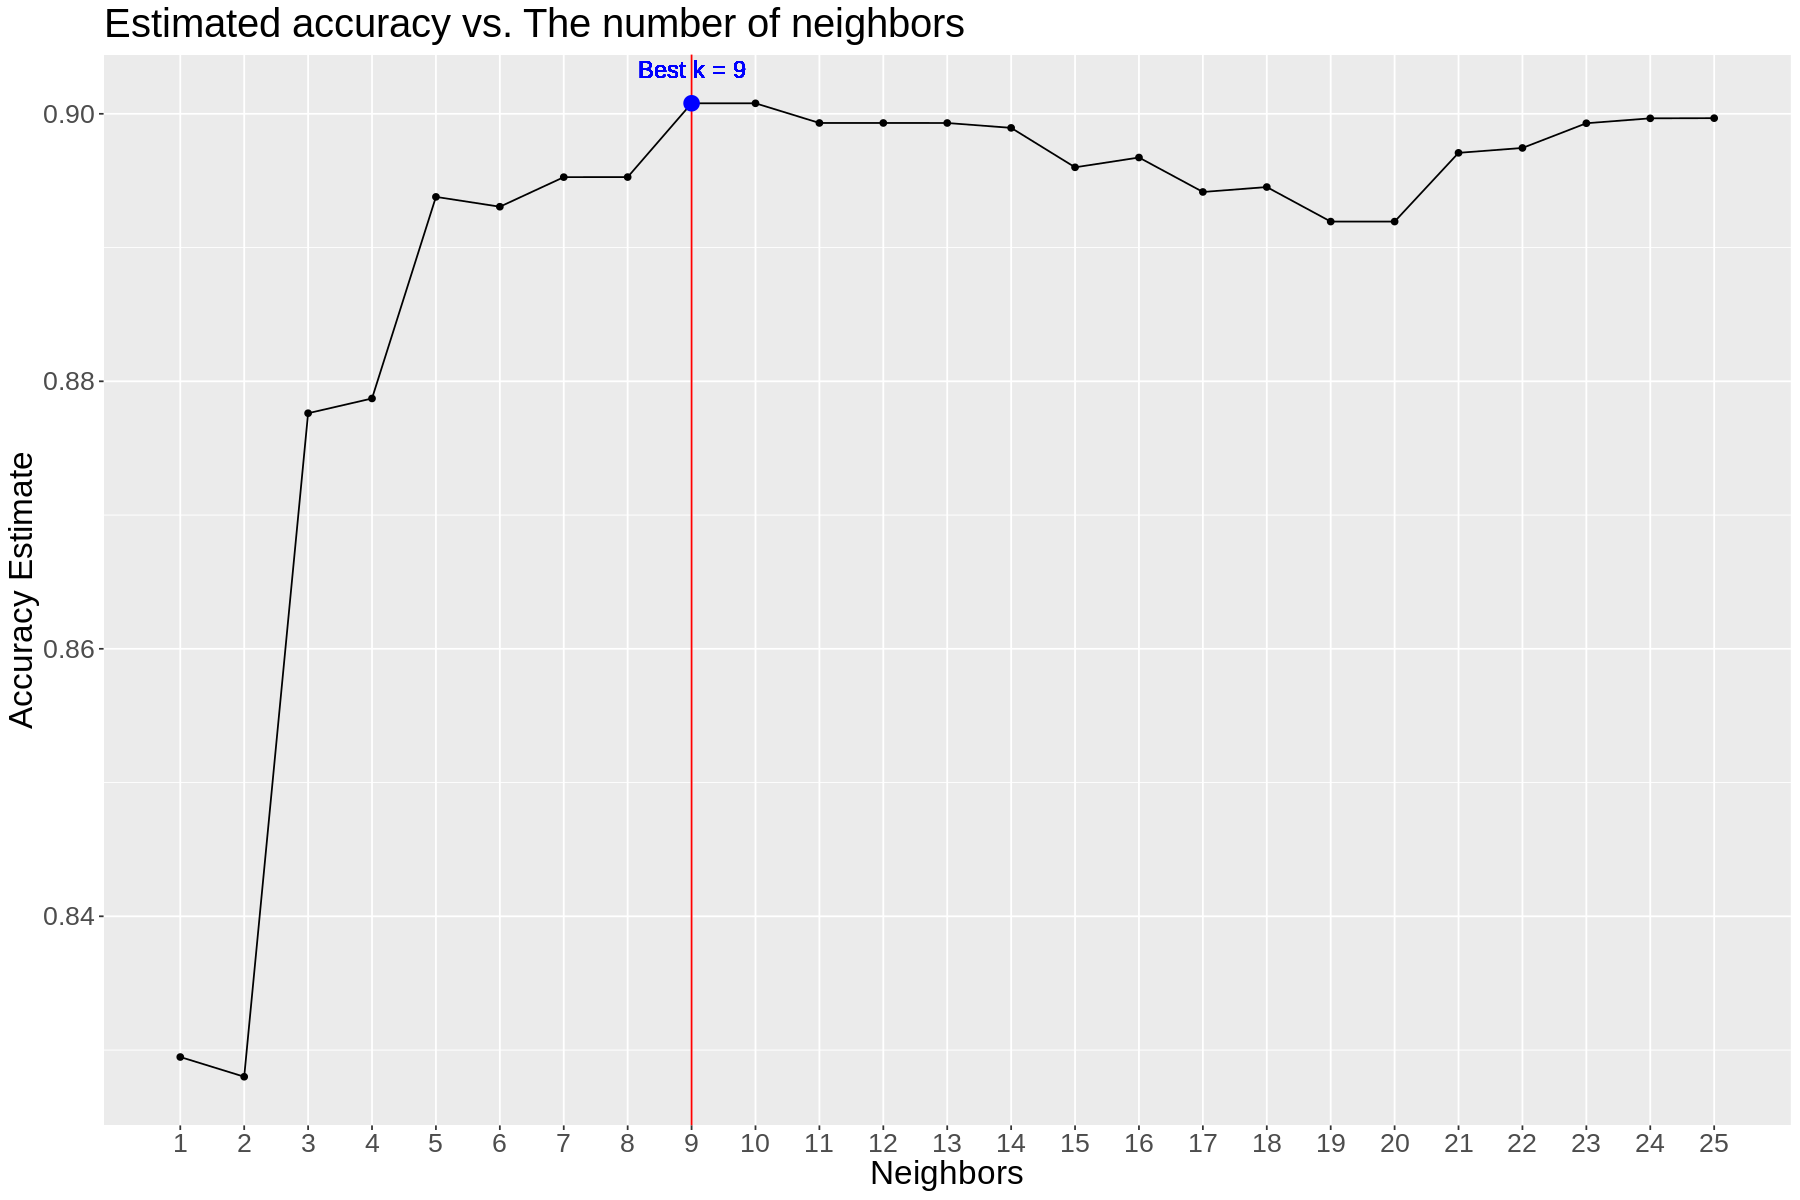

In [16]:
best_k <- students_results$neighbors[which.max(students_results$mean)]
max_accuracy_k <- max(students_results$mean)

options(repr.plot.width = 15, repr.plot.height = 10)

accuracy_vs_k <- students_results |> 
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    geom_vline(xintercept = best_k, color = "red") +
    geom_point(data = subset(students_results, neighbors == best_k), aes(x = neighbors, y = mean), size = 4, color = "blue") + 
    labs(x = "Neighbors", y = "Accuracy Estimate") +
    ggtitle("Estimated accuracy vs. The number of neighbors") + 
    geom_text(aes(x = best_k, y = max_accuracy_k, label = paste("Best k =", best_k)), 
            vjust = -1.5, color = "blue", size = 5) +
    scale_x_continuous(limits = c(1,25), breaks = seq(1,25), minor_breaks = seq(1,25,1)) +
    theme(text = element_text(size = 20))
accuracy_vs_k

<center>Figure 5: Plot of estimated accurary vs the number of neighbors</center>

From the plot we can easily find that the best k is 9, we use this k value to build our classification model:

In [17]:
#with the best k:
knn_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 12) |>
    set_engine("kknn") |>
    set_mode("classification")

students_fit <- workflow() |>
    add_recipe(students_recipe) |>
    add_model(knn_best_spec) |>
    fit(data = students_train )

Finally we use the test set to evaluate the accuracy by predicting the students' academic statuses:

In [18]:
#prediction:
students_predictions <- predict(students_fit , students_test) |> 
    bind_cols(students_test)

# Convert to factor
students_predictions$Target <- as.factor(students_predictions$Target)

# Compare the accuracy of predictions to the true values in the test set
students_acc <- students_predictions |> 
    metrics(truth = Target, estimate = .pred_class)  |>
    select(.metric, .estimate)|> 
    filter(.metric == "accuracy")
students_acc 

.metric,.estimate
<chr>,<dbl>
accuracy,0.8613861


<center>Table 6: Accuracy of the model</center>

According to the table 6, the accuracy of our predictions was at 86%.

### Visualization of the model

To visualize the effect of our classification model,  as examples, we create plots for the prediction result of one of the binary variables and numerical variables respectively, and then compare the plots to the plots of actual data. Fianlly, we also visualize the confusion matrix of our prediction to see the accurary of it. By comparing these plots, we can clearly see that our classification model is doing very well.

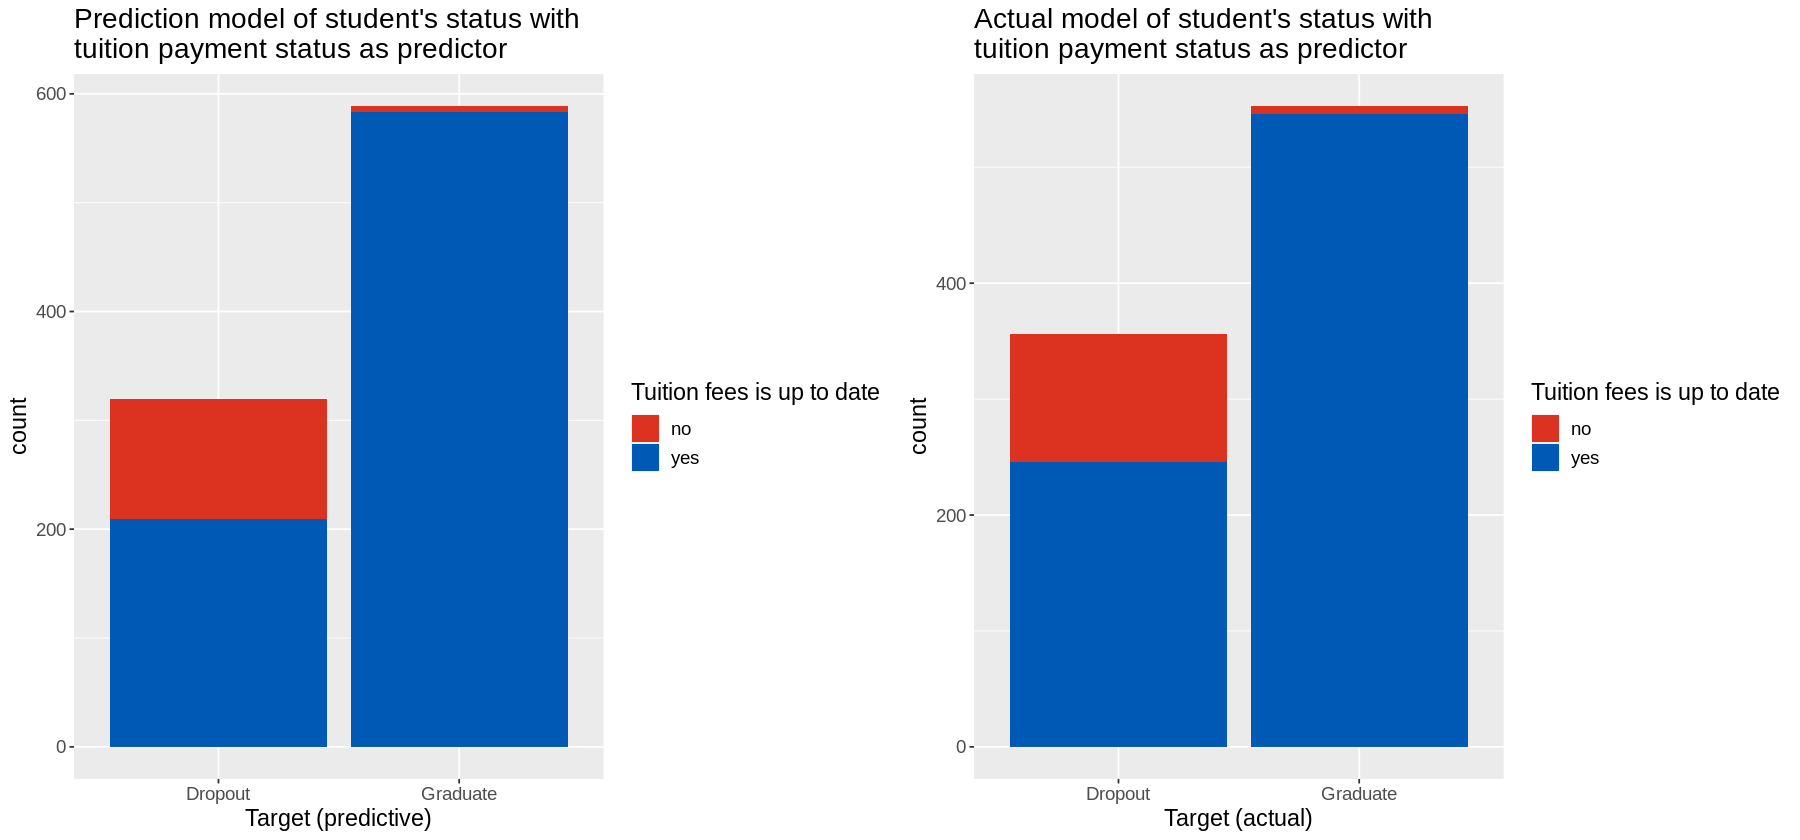

In [31]:
options(repr.plot.width = 15, repr.plot.height = 7)
tuition_prediction <- students_predictions |>
    ggplot(aes(x=.pred_class, fill =as_factor(Tuition.fees.up.to.date))) +
    geom_bar() +
     labs(x = "Target (predictive)",
          fill = "Tuition fees is up to date") +
         theme(text = element_text(size = 14)) +
         scale_fill_manual(labels = c("no", "yes"), values = c("#DC3220", "#005AB5"))+
        ggtitle("Prediction model of student's status with \ntuition payment status as predictor")

tuition_actual <- students_predictions |>
    ggplot(aes(x=Target, fill =as_factor(Tuition.fees.up.to.date))) +
    geom_bar()+
     labs(x = "Target (actual)",
          fill = "Tuition fees is up to date") +
         theme(text = element_text(size = 14)) +
         scale_fill_manual(labels = c("no", "yes"), values = c("#DC3220", "#005AB5"))+
         ggtitle("Actual model of student's status with \ntuition payment status as predictor")

plot_grid(tuition_prediction,tuition_actual, ncol = 2)

<center>Figure 7.1: Comparison of predictive classification (binary variables) and actual classification of if Tuition fees is up to date</center>

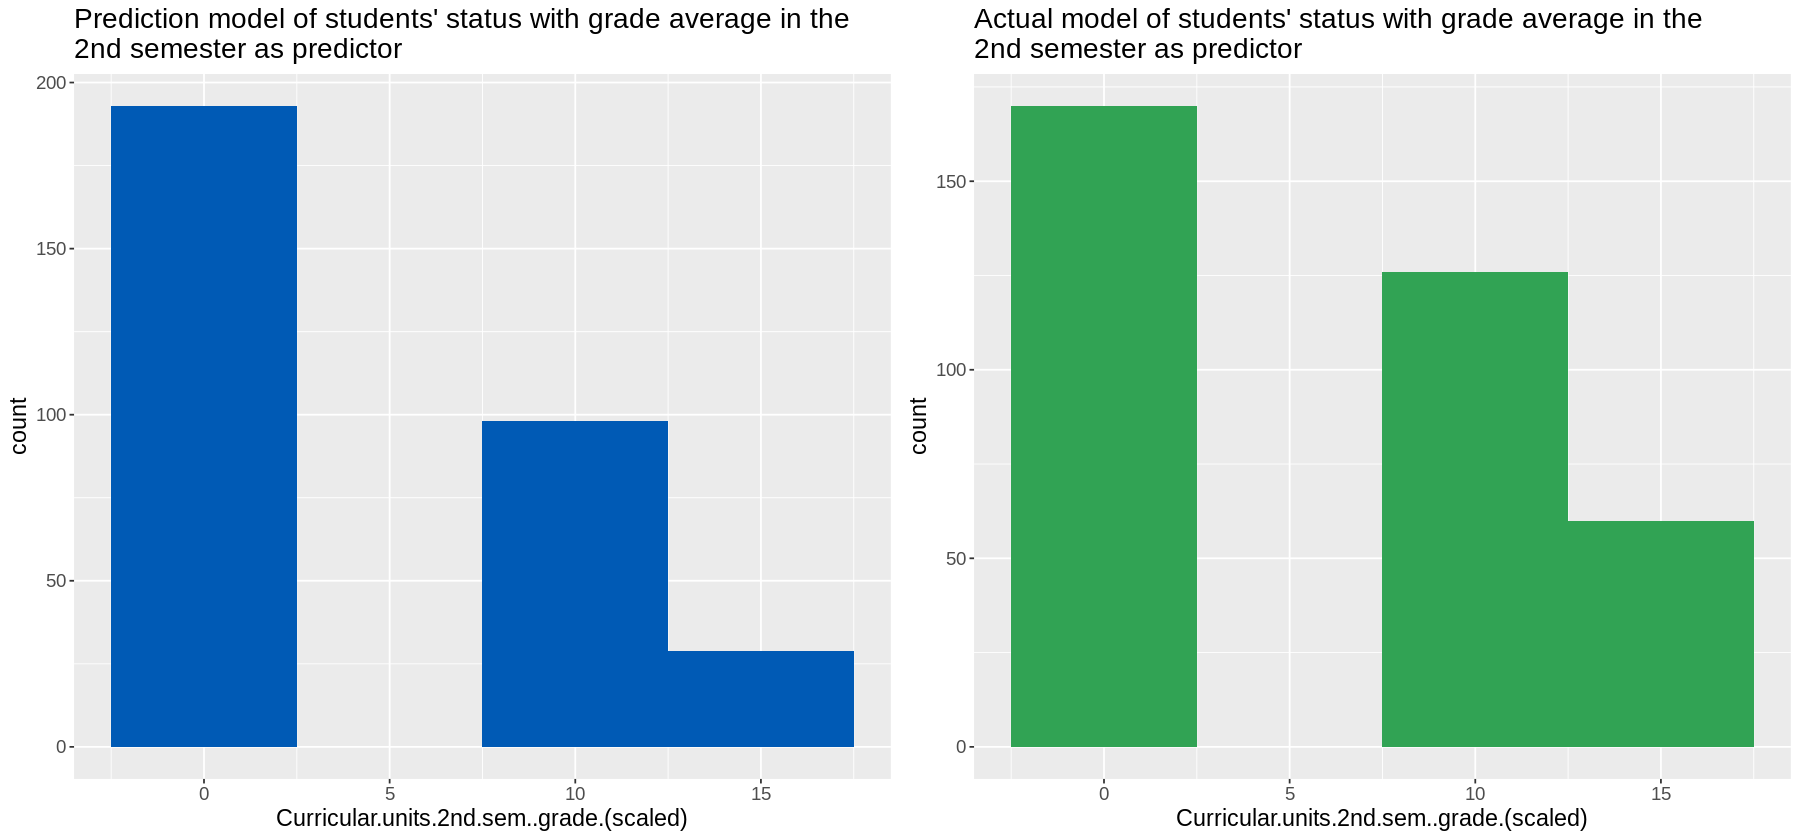

In [30]:
sem2Grade_prediction_dis <- students_predictions |>
# the predict result is diabetes label
  filter(.pred_class == "Dropout") |>
  ggplot(aes(x = Curricular.units.2nd.sem..grade.)) +
  geom_histogram(binwidth = 5, fill = "#005AB5")+
  xlab("Curricular.units.2nd.sem..grade.(scaled)")+
  theme(text = element_text(size = 14))+
ggtitle("Prediction model of students' status with grade average in the \n2nd semester as predictor")

sem2Grade_actual_dis <- students_predictions |>
# the predict result is diabetes label
  filter(Target == "Dropout") |>
  ggplot(aes(x = Curricular.units.2nd.sem..grade.)) +
  geom_histogram(binwidth = 5, fill = "#31a354")+
  xlab("Curricular.units.2nd.sem..grade.(scaled)") +
  theme(text = element_text(size = 14))+
ggtitle("Actual model of students' status with grade average in the \n2nd semester as predictor")

plot_grid(sem2Grade_prediction_dis, sem2Grade_actual_dis, ncol = 2)

<center>Figure 7.2: Comparison of predictive classification (numerical variables) and actual classification of grade average in the 2nd semester</center>

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



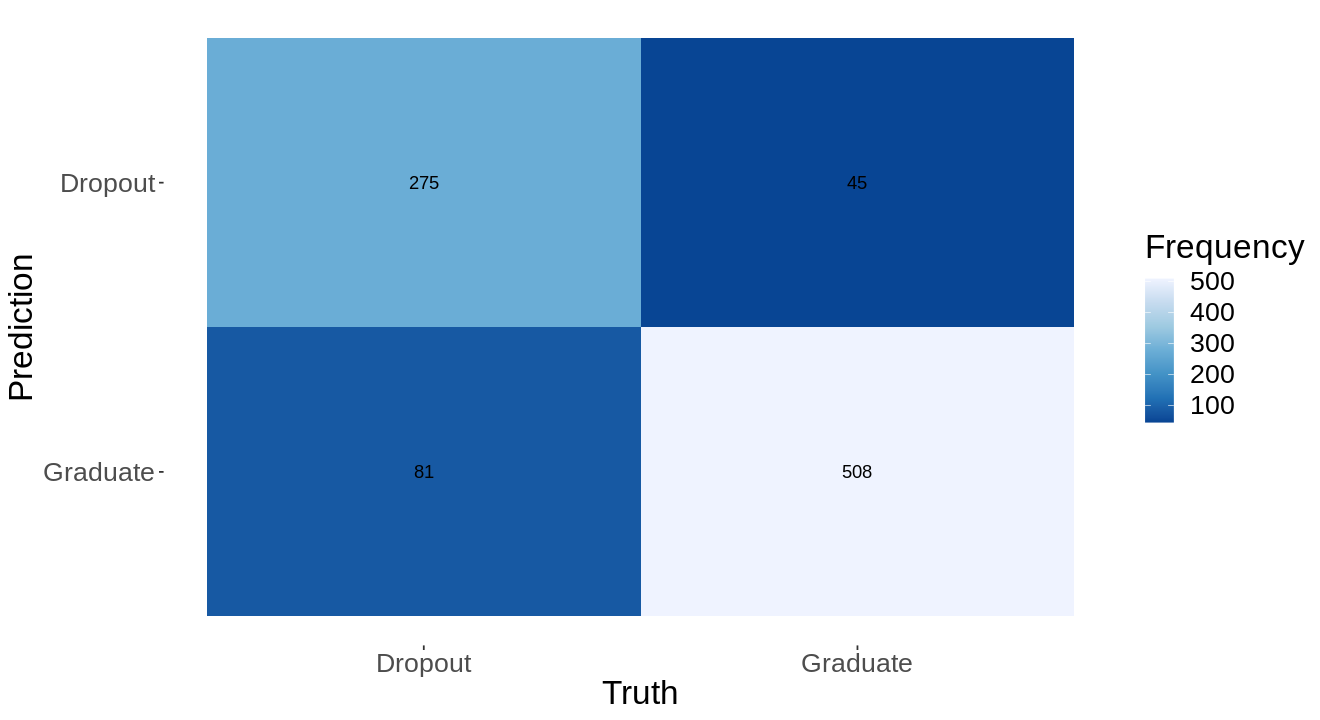

In [34]:
options(repr.plot.width = 11, repr.plot.height = 6)
students_mat <- students_predictions |>
    conf_mat(truth = Target, estimate = .pred_class)

autoplot(students_mat, type = "heatmap") + 
    scale_fill_distiller(name = "Frequency") +
    theme(legend.position = "right", text = element_text(size = 20), plot.caption = element_text(size = 20, hjust = 0))

<center>Figure 8: Confusion matrix of the accuracy of the model</center>

## 4. Discussion

Based on the analysis above, we find that using six predictors (Tuition.fees.up.to.date, Scholarship.holder, Debtor, Curricular.units.1st.sem..approved., Curricular.units.2nd.sem..approved. , Curricular.units.2nd.sem..grade.) is the most accurate (Table 4 & Figure 4) to predict students' academic status with the accuracy of 86.14% (Table 6).

By wrangling and selecting the most related variables in the dataset, we can determine which factors should be paid more attention on by the school to help students to achieve academic success (Figure 2.2 & Figure 3). In terms of the expectations, we anticipated that the academic performance and personal or family economic conditions would play a significant role in predicting dropout and academic success (Long, Z. A., & Noor, M. F. M., et al., 2023). Overall, our results were consistent with these expectations, For instance, better academic grades, a larger number of approved curricular units over the semesters and the scholarship recipient could indicate a greater possibility of successful completion; Also the status about tuition fee payments and debtor status could be viewed as the indicator of the student’s financial situation to predict the possibility of dropping out. 

In conclusion,  we hope through our finding, educational institutions can gain some data-based insights on how to allocate resources and develop effective policies in the areas where students are more likely to encounter difficulties. For example, developing targeted financial support programs to mitigate students’ financial challenges, or monitoring students' academic progress in school by administrators and proper motivation of students (Oragwu, A. A.,2020). By understanding these factors, educational institutions can develop corresponding approaches and create a more equitable learning environment to help students improve their successful graduation rates.

Further questions:
1. How does the choice of application mode impact students’ academic performance and overall success in the study?
2. Does our model have limitations? Can our model fit to all countries, and if not what data and method should we change or add accordingly?

## Reference
1. Realinho, V., Machado, J., Baptista, L., & Martins, M. V. (2022, October 28). Predicting Student Dropout and Academic Success. MDPI. https://doi.org/10.3390/data7110146
2. UCI Machine Learning Repository. (n.d.). https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success
3. K-Nearest Neighbor in Machine Learning. (n.d.). https://www.knowledgehut.com/blog/data-science/knn-for-machine-learning
4. Long, Z. A., & Noor, M. F. M. (2023). Factors Influencing Dropout Students in Higher Education. Education Research International, 2023.
5. Oragwu, A. A. (2020). MINIMIZING STUDENTS’DROPOUT RATES IN UNIVERSITIES FOR SUSTAINABLE DEVELOPMENT. International Journal of Educational Research and Policy Making, 3(1), 511-521.